# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [146]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [147]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [148]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\mjain\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


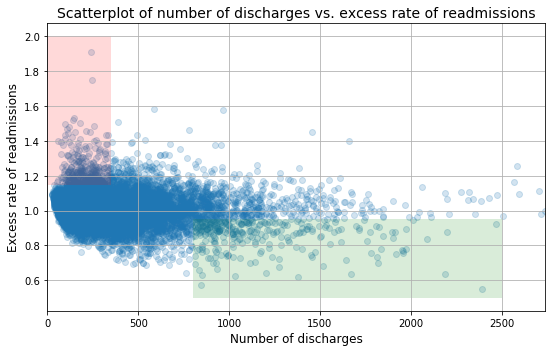

In [149]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [150]:
clean_hospital_read_df.head(19)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [151]:
clean_hospital_read_data =clean_hospital_read_df.dropna(subset = ['Excess Readmission Ratio'])

In [152]:
clean_hospital_read_data.shape

(11497, 12)

We will do pearson correlation test and the resulting p value to guide us if the correlation is signficiant. Our null hypothesis is that there is no correlation 

In [153]:
#peason correlation test along with p value
corr, pval=stats.pearsonr(clean_hospital_read_data['Number of Discharges'], clean_hospital_read_data['Excess Readmission Ratio'])
print('pearson correlation=',corr,"  ;   pval=",pval)


pearson correlation= -0.0973979435108   ;   pval= 1.22254737768e-25


We get a very small negative correlation. Not much weight needs to be given to the very small p value  here because  with such large samples, p value will always be small and hence any small correlation will appear to be significant. 

The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true.If the above correlation are significant at at p <<0.01 is , they are by definition significant for alpha = 0.01. Practically speaking the correlation is very small to make any decision based on it. The claims that it is trending down with increasing number of discharges cannot be proven with such small correlation value 

We will split the data into three buckets to test the conclusions in the report-hosptial with number of discharges less than 100, with number of discharges more than 1000 and the rest. 

In [155]:
#Three dataframs based on number of dischages
clean_hosptial_read_data_below100=clean_hospital_read_data[clean_hospital_read_data['Number of Discharges']<100]
clean_hosptial_read_data_between=clean_hospital_read_data[(clean_hospital_read_data['Number of Discharges']>=100)&(clean_hospital_read_data['Number of Discharges']<=1000)]
clean_hosptial_read_data_above1000=clean_hospital_read_data[clean_hospital_read_data['Number of Discharges']>1000]

In [156]:
#checking shape
print(clean_hosptial_read_data_below100.shape)
print(clean_hosptial_read_data_between.shape)
print(clean_hosptial_read_data_above1000.shape)


(1188, 12)
(9846, 12)
(463, 12)


# B. Statistics
In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [263]:
#checking the above claims on mean excess readmission rate
print('mean excess readmission rate  for discharges<100: ',clean_hosptial_read_data_below100["Excess Readmission Ratio"].mean())
print('mean excess readmission rate for discharges between 100 and 1000:',clean_hosptial_read_data_between["Excess Readmission Ratio"].mean())
print('mean excess readmission ratefor discharges>1000:',clean_hosptial_read_data_above1000["Excess Readmission Ratio"].mean())
print('mean excess readmission rate for discharges All:',clean_hospital_read_data["Excess Readmission Ratio"].mean())

mean excess readmission rate  for discharges<100:  1.0226183501683506
mean excess readmission rate for discharges between 100 and 1000: 1.0070517062766557
mean excess readmission ratefor discharges>1000: 0.9783354211663071
mean excess readmission rate for discharges All: 1.0075037835957146


In [262]:
#checking percentage readmission rate greater than one for hosptials with discharges <100
(clean_hosptial_read_data_below100["Excess Readmission Ratio"]>1).sum()/len(clean_hosptial_read_data_below100["Excess Readmission Ratio"])

0.63215488215488214

In [159]:
#checking percentage readmission rate greater than one for hosptials with discharges >1000
(clean_hosptial_read_data_above1000["Excess Readmission Ratio"]>1).sum()/len(clean_hosptial_read_data_above1000["Excess Readmission Ratio"])

0.44492440604751621

# Q)#Look at the scatterplot above. 
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The scatter plot gives a visual representaion for dispersion of one feature with respect to another. Problem is that when we have  large no of data points, a scatter plot reveals little structure. Other problem is when you have lot of overlapping points it can be hard to get a sense for their density. There appears to be large number of data points for hospital with small discharges which leads to similar problems in the scatter plot above. We will plot graphs that give and idea of density and also plot separate box plots for the three buckets. 

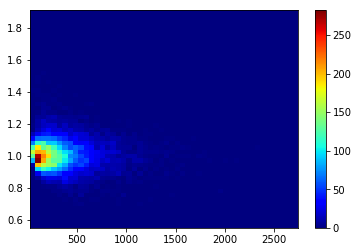

In [265]:
#scatter plot with density
ln=np.log(x)
ax2=plt.hist2d(x, y, (50, 50), cmap=plt.cm.jet)
plt.colorbar()



In [266]:
#series for excess readmission ratio for hosptials with different discharge rates
below100=clean_hosptial_read_data_below100['Excess Readmission Ratio']
between=clean_hosptial_read_data_between['Excess Readmission Ratio']
above1000=clean_hosptial_read_data_above1000['Excess Readmission Ratio']
alldata=clean_hospital_read_data['Excess Readmission Ratio']

C:\Users\mjain\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


[Text(1,0,'Below_100 Discharge'),
 Text(2,0,'Btween_100_and_1000 Discharge'),
 Text(3,0,'Above_1000 Discharge'),
 Text(4,0,'All Data')]

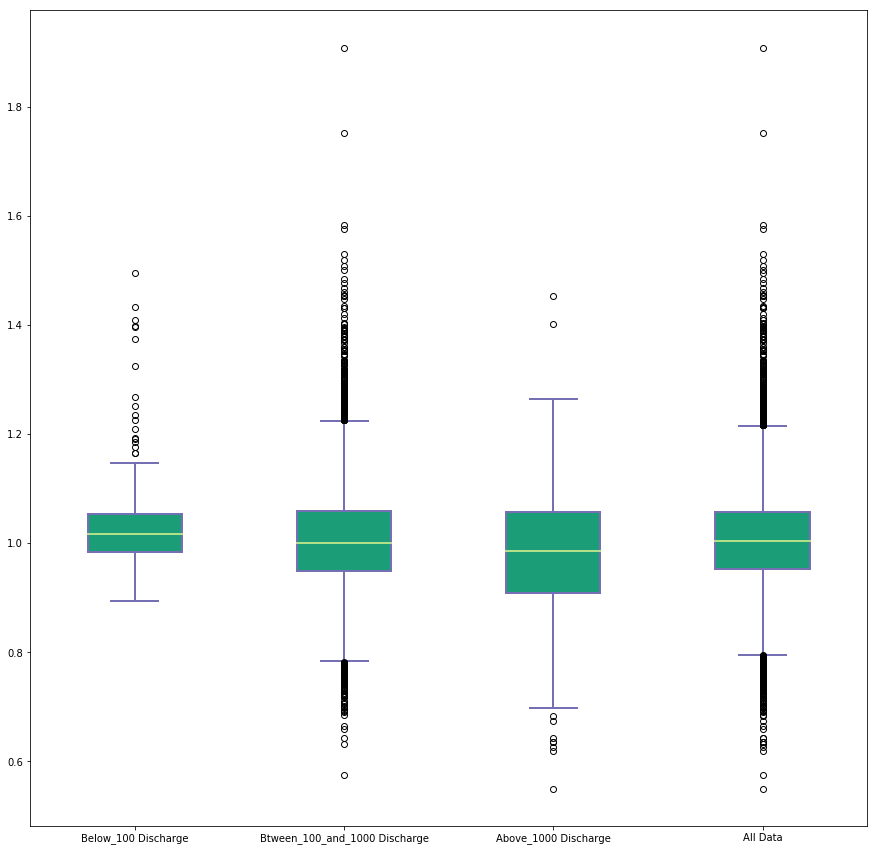

In [267]:
#box plot
data = [below100, between, above1000,alldata]
# Create a figure instance
fig = plt.figure(1, figsize=(15, 15))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

## add patch_artist=True option to ax.boxplot() 
## to get fill color

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)


ax.set_xticklabels(['Below_100 Discharge', 'Btween_100_and_1000 Discharge', 'Above_1000 Discharge','All Data'])

We will compare three groups (below 100 discharges, above 1000 discharges and between 100 and 1000 discharges) to check if there is no difference their in the excess readmission ratio. We will first check if the data is approximately normally distributed.  Our null hypothesis will be that the average excess readmission ratio is the same for hospitals with below 100 discharges, above 1000 dischargees, and the remaining.  

In [234]:
#calculaing mean, std dvn for all buckets
mu_below100=np.mean(below100)
sigma_below100=np.std(below100)
bins_below100=np.int(np.sqrt(len(below100)))
mu_between=np.mean(between)
sigma_between=np.std(between)
bins_between=np.int(np.sqrt(len(between)))
mu_above1000=np.mean(above1000)
sigma_above1000=np.std(above1000)
bins_above1000=np.int(np.sqrt(len(above1000)))
mu_alldata=np.mean(alldata)
sigma_alldata=np.std(alldata)
bins_alldata=np.int(np.sqrt(len(alldata)))
print(sigma_below100)
print(sigma_between)
print(sigma_above1000)
print(sigma_alldata)

0.05795419632801004
0.09341268597524952
0.11987768585552241
0.09196026645631224


Text(0.5,1,'Discharge All')

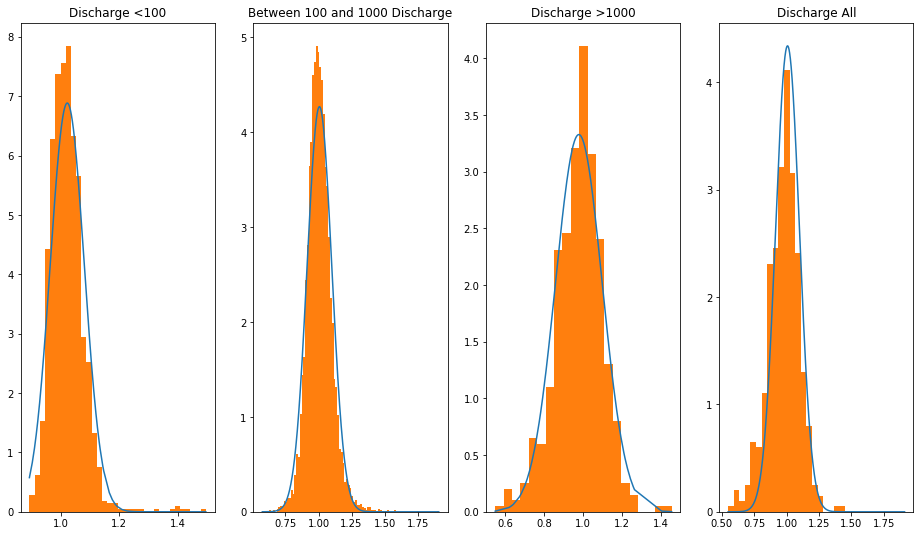

In [237]:
#plotting to check if the data for three buckets is approximately normal
graph = plt.figure(figsize=(16,9))

ax0 = graph.add_subplot(1,4,1)
graph1 = stats.norm.pdf(sorted(below100), mu_below100, sigma_below100)
ax0.plot(sorted(below100), graph1)
ax0.hist(below100,normed=True,bins=bins_below100)
ax0.set_title("Discharge <100")

ax1 = graph.add_subplot(1,4,2)
graph1 = stats.norm.pdf(sorted(between), mu_between, sigma_between)
ax1.plot(sorted(between), graph1)
ax1.hist(between,normed=True,bins=bins_between)
ax1.set_title("Between 100 and 1000 Discharge")

ax2 = graph.add_subplot(1,4,3)
graph1 = stats.norm.pdf(sorted(above1000), mu_above1000, sigma_above1000)
ax2.plot(sorted(above1000), graph1)
ax2.hist(above1000,normed=True,bins=bins_above1000)
ax2.set_title("Discharge >1000")


ax3 = graph.add_subplot(1,4,4)
graph1 = stats.norm.pdf(sorted(alldata), mu_alldata, sigma_alldata)
ax3.plot(sorted(alldata), graph1)
ax3.hist(above1000,normed=True,bins=bins_above1000)
ax3.set_title("Discharge All")

In [160]:
#testing null hypothesis that hosptials with discharge below 100 and above 1000 have same mean excess readmission ratio
stats.ttest_ind(clean_hosptial_read_data_below100["Excess Readmission Ratio"],clean_hosptial_read_data_above1000["Excess Readmission Ratio"],equal_var=False)

Ttest_indResult(statistic=7.6017424185004856, pvalue=1.2752435451140344e-13)

The low p value in t test above indicates that we can reject the hypothesis that the mean excess readmission ratio for hosptials with discharge less than 100 and above 1000 is same. We will now do a ANOVA test to also include the bucket of hospitals with discharges between 100 and 1000. Since our data appears to be normally and independently distributed and standard deviations are not too far apart, ANOVA test can be done. Our null hypothesis is that the mean excess readmission ratio of all three buckets is the same.

In [240]:
f , p =stats.f_oneway(below100, between, above1000)
print ('f value : ', f)
print ('p value : ', p)

f value :  39.7179578928
p value :  6.45717308037e-18


The small p value indicates that our null hypothesis that the mean excess readmission ratio of the three groups (below 100 discharges, between 100 and 1000 dishcarges, above 1000 discharges) is similar can be rejected. Further investigation needs to be done if there are other factors impacting the level of excess readmission ratios 